In [ ]:
1. Data should not have any missing values
2. Extract Features and Target
3. Features should be of numeric nature
4. Features should have some rows and some columns
5. Features should be of the type array/ dataframe
6. Split the data into- training and testing
7. Features should be on the same scale
8. Train the model on the training dataset
9. Test the model on the testing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv("Leads.csv")

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1. Data should not have any missing values

In [3]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [4]:
df.shape

(9240, 37)

In [5]:
df["Lead Source"].isna().sum()

36

If more than 33 percent of the values in a column are missing, then we always "remove that column"

In [6]:
for i in df.columns:
    if df[i].isna().sum() > (9240*0.33):
        df=df.drop(i,axis="columns")

In [7]:
df.shape

(9240, 31)

In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
df["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [10]:
df["Lead Source"].fillna(df["Lead Source"].mode()[0],inplace=True)

In [11]:
df["Lead Source"].mode()[0]

'Google'

In [12]:
df["TotalVisits"].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

<AxesSubplot:ylabel='TotalVisits'>

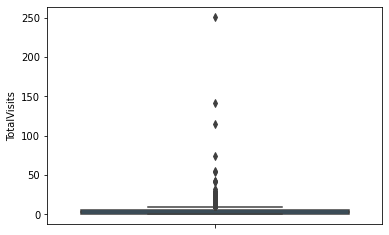

In [13]:
sns.boxplot(y=df["TotalVisits"],whis=[5,95])

In [14]:
df["TotalVisits"].fillna(df["TotalVisits"].median(),inplace=True)

In [15]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
df["Last Activity"].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [19]:
df["Last Activity"].fillna(df["Last Activity"].mode()[0],inplace=True)

In [20]:
df.shape

(9240, 31)

In [21]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [22]:
df["Country"].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [23]:
df.shape

(9240, 31)

In [24]:
df=df[df["Country"].notna()]

In [25]:
df.shape

(6779, 31)

In [26]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                    592
How did you hear about X Education               1352
What is your current occupation                  1834
What matters most to you in choosing a course    1853
Search                                              0
Magazine                                            0
Newspaper Article           

Example how notna works

In [27]:
df1 = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[7, 2, 54, 3, None],
                   "C":[20, 16, 11, 3, 8],
                   "D":[14, 3, None, 2, 6]})

In [28]:
df1

,A,B,C,D
0,12.0,7.0,20,14.0
1,4.0,2.0,16,3.0
2,5.0,54.0,11,NaN
3,NaN,3.0,3,2.0
4,1.0,NaN,8,6.0


In [29]:
df1.shape

(5, 4)

In [30]:
df1=df1[df1["A"].notna()]

In [31]:
df1

,A,B,C,D
0,12.0,7.0,20,14.0
1,4.0,2.0,16,3.0
2,5.0,54.0,11,NaN
4,1.0,NaN,8,6.0


In [32]:
df["Specialization"].fillna(df["Specialization"].mode()[0],inplace=True)

In [33]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education               1352
What is your current occupation                  1834
What matters most to you in choosing a course    1853
Search                                              0
Magazine                                            0
Newspaper Article           

In [34]:
df["How did you hear about X Education"].unique()

array(['Select', 'Word Of Mouth', 'Other', 'Online Search', nan,
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [35]:
df["How did you hear about X Education"].fillna(df["How did you hear about X Education"].mode()[0],inplace=True)

In [36]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                  1834
What matters most to you in choosing a course    1853
Search                                              0
Magazine                                            0
Newspaper Article           

In [37]:
df["What is your current occupation"].fillna(df["What is your current occupation"].mode()[0],inplace=True)

In [38]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course    1853
Search                                              0
Magazine                                            0
Newspaper Article           

In [39]:
df["What matters most to you in choosing a course"].unique()

array(['Better Career Prospects', nan, 'Other'], dtype=object)

In [40]:
df["What matters most to you in choosing a course"].fillna(df["What matters most to you in choosing a course"].mode()[0],inplace=True)

In [41]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [42]:
df["Lead Profile"].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads',
       'Dual Specialization Student', 'Student of SomeSchool',
       'Lateral Student'], dtype=object)

In [43]:
df["Lead Profile"].fillna(df["Lead Profile"].mode()[0],inplace=True)

In [44]:
df.isna().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                        0
Total Time Spent on Website                        0
Page Views Per Visit                               0
Last Activity                                      0
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

In [45]:
df["City"].fillna(df["City"].mode()[0],inplace=True)

In [46]:
df.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

# 2. Extract Features and Target


In [47]:
y=df["Converted"]

In [48]:
X=df.drop("Converted",axis="columns")

In [49]:
X

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Other Metro Cities,No,No,SMS Sent


In [50]:
X=X.drop(["Prospect ID","Lead Number"],axis='columns')

In [51]:
X

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,No,No,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
6,Landing Page Submission,Google,No,No,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Other Metro Cities,No,No,SMS Sent


# 3. Features should be of numeric nature


In [52]:
NonNumericColumns=X.columns[X.dtypes=="object"]

In [53]:
X=pd.get_dummies(X,columns=NonNumericColumns,drop_first=True)

In [54]:
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable A

# 4. Features should have some rows and some columns


In [55]:
X.shape

(6779, 143)

# 5. Features should be of the type array/ dataframe


In [56]:
type(X)

pandas.core.frame.DataFrame

# 6. Split the data into- training and testing


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4,stratify=y)

# 7. Features should be on the same scale


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler=MinMaxScaler()

In [61]:
X_train=scaler.fit_transform(X_train)

In [62]:
X_test=scaler.transform(X_test)

# 8. Train the model on the training dataset


In [63]:
X.shape

(6779, 143)

In [64]:
from sklearn.feature_selection import RFE

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model=LogisticRegression()

In [67]:
feature_selection=RFE(model,15)

In [68]:
feature_selection.fit(X_train,y_train)

C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mudigonda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [69]:
feature_selection.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,

In [70]:
TopColumns=X.columns[feature_selection.support_]

In [71]:
TopColumns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation', 'Country_Qatar',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [72]:
X_train.shape

(5423, 143)

In [73]:
X_test.shape

(1356, 143)

In [74]:
X_train=pd.DataFrame(X_train,columns=X.columns)

In [75]:
X_test=pd.DataFrame(X_test,columns=X.columns)

In [76]:
X_train=X_train[TopColumns]

In [77]:
X_test=X_test[TopColumns]

In [78]:
X_train.shape

(5423, 15)

In [79]:
X_test.shape

(1356, 15)

In [80]:
from statsmodels.api import GLM

In [81]:
X_train

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Country_Qatar,What is your current occupation_Housewife,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
0,0.021277,0.042694,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028369,0.021127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014184,0.683539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.021277,0.047095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.035461,0.847271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,0.014184,0.152289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5419,0.028369,0.046655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5420,0.007092,0.061180,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5421,0.042553,0.044454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
y_train

2331    0
1155    0
3026    0
6023    0
3095    1
       ..
4251    0
3724    0
5332    0
1505    0
5548    1
Name: Converted, Length: 5423, dtype: int64

In [83]:
y_train=y_train.reset_index(drop=True)

In [84]:
y_train

0       0
1       0
2       0
3       0
4       1
       ..
5418    0
5419    0
5420    0
5421    0
5422    1
Name: Converted, Length: 5423, dtype: int64

In [85]:
pValues=GLM(y_train,X_train).fit()

In [86]:
pValues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5423
Model:                            GLM   Df Residuals:                     5408
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13234
Method:                          IRLS   Log-Likelihood:                -2203.8
Date:                Tue, 07 Dec 2021   Deviance:                       715.72
Time:                        12:36:24   Pearson chi2:                     716.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
TotalVisits                                              0.7867      0.138      5.707      0.000       0.517       1.057
Total Time Spent on Website                              0.7814      0.019     42.178      0.000       0.745       0.818
Lead Origin_Lead Add Form                                0.6421      0.163      3.943      0.000       0.323       0.961
Lead Source_Reference                                   -0.2370      0.187     -1.268      0.205      -0.603       0.129
Do Not Email_Yes                                        -0.1595      0.017     -9.129      0.000      -0.194      -0.125
Last Activity_Converted to Lead                         -0.0759      0.020     -3.769      0.000      -0.115      -0.036
Last Activity_Had a Phone Conversation                   0.3317      0.082      4.066      0.000       0.172       0.492
Country_Qatar                                           -0.2569      0.129     -1.996      0.046      -0.509      -0.005
What is your current occupation_Housewife                0.5304      0.138      3.836      0.000       0.259       0.801
What is your current occupation_Working Professional     0.3203      0.020     15.885      0.000       0.281       0.360
Lead Profile_Lateral Student                             0.5437      0.105      5.161      0.000       0.337       0.750
Lead Profile_Potential Lead                              0.2983      0.014     21.439      0.000       0.271       0.326
Lead Profile_Student of SomeSchool                      -0.1065      0.032     -3.307      0.001      -0.170      -0.043
Last Notable Activity_SMS Sent                           0.2519      0.012     21.768      0.000       0.229       0.275
Last Notable Activity_Unreachable                        0.3002      0.080      3.773      0.000       0.144       0.456
========================================================================================================================
"""

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
VIF=[]
for i in range(X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))
result=pd.DataFrame() 
result["Feature"]=X_train.columns
result["VIF"]=VIF
result.sort_values(by="VIF",ascending=False)

,Feature,VIF
3,Lead Source_Reference,4.219848
2,Lead Origin_Lead Add Form,4.209410
1,Total Time Spent on Website,1.896094
0,TotalVisits,1.564417
13,Last Notable Activity_SMS Sent,1.331324
11,Lead Profile_Potential Lead,1.281397
9,What is your current occupation_Working Profes...,1.167645
4,Do Not Email_Yes,1.069606
5,Last Activity_Converted to Lead,1.030884
12,Lead Profile_Student of SomeSchool,1.026303


In [89]:
X_train=X_train.drop("Lead Source_Reference",axis='columns')

In [90]:
X_test=X_test.drop("Lead Source_Reference",axis='columns')

In [91]:
pValues=GLM(y_train,X_train).fit()
pValues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5423
Model:                            GLM   Df Residuals:                     5409
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13236
Method:                          IRLS   Log-Likelihood:                -2204.6
Date:                Tue, 07 Dec 2021   Deviance:                       715.93
Time:                        12:36:30   Pearson chi2:                     716.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
TotalVisits                                              0.7894      0.138      5.727      0.000       0.519       1.060
Total Time Spent on Website                              0.7819      0.019     42.206      0.000       0.746       0.818
Lead Origin_Lead Add Form                                0.4621      0.080      5.782      0.000       0.305       0.619
Do Not Email_Yes                                        -0.1596      0.017     -9.135      0.000      -0.194      -0.125
Last Activity_Converted to Lead                         -0.0760      0.020     -3.771      0.000      -0.115      -0.037
Last Activity_Had a Phone Conversation                   0.3318      0.082      4.066      0.000       0.172       0.492
Country_Qatar                                           -0.2570      0.129     -1.997      0.046      -0.509      -0.005
What is your current occupation_Housewife                0.5223      0.138      3.781      0.000       0.252       0.793
What is your current occupation_Working Professional     0.3196      0.020     15.855      0.000       0.280       0.359
Lead Profile_Lateral Student                             0.5435      0.105      5.160      0.000       0.337       0.750
Lead Profile_Potential Lead                              0.2977      0.014     21.408      0.000       0.270       0.325
Lead Profile_Student of SomeSchool                      -0.1066      0.032     -3.311      0.001      -0.170      -0.043
Last Notable Activity_SMS Sent                           0.2517      0.012     21.757      0.000       0.229       0.274
Last Notable Activity_Unreachable                        0.3002      0.080      3.773      0.000       0.144       0.456
========================================================================================================================
"""

In [92]:
VIF=[]
for i in range(X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))
result=pd.DataFrame() 
result["Feature"]=X_train.columns
result["VIF"]=VIF
result.sort_values(by="VIF",ascending=False)

,Feature,VIF
1,Total Time Spent on Website,1.895442
0,TotalVisits,1.564023
12,Last Notable Activity_SMS Sent,1.331232
10,Lead Profile_Potential Lead,1.280067
8,What is your current occupation_Working Profes...,1.166756
3,Do Not Email_Yes,1.069583
4,Last Activity_Converted to Lead,1.030880
11,Lead Profile_Student of SomeSchool,1.026293
2,Lead Origin_Lead Add Form,1.013506
7,What is your current occupation_Housewife,1.008964


In [93]:
X_train=X_train.drop("Country_Qatar",axis='columns')
X_test=X_test.drop("Country_Qatar",axis='columns')

In [94]:
pValues=GLM(y_train,X_train).fit()
pValues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5423
Model:                            GLM   Df Residuals:                     5410
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.13243
Method:                          IRLS   Log-Likelihood:                -2206.6
Date:                Tue, 07 Dec 2021   Deviance:                       716.46
Time:                        12:36:34   Pearson chi2:                     716.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
TotalVisits                                              0.7887      0.138      5.721      0.000       0.518       1.059
Total Time Spent on Website                              0.7815      0.019     42.176      0.000       0.745       0.818
Lead Origin_Lead Add Form                                0.4622      0.080      5.781      0.000       0.305       0.619
Do Not Email_Yes                                        -0.1600      0.017     -9.156      0.000      -0.194      -0.126
Last Activity_Converted to Lead                         -0.0760      0.020     -3.768      0.000      -0.115      -0.036
Last Activity_Had a Phone Conversation                   0.3318      0.082      4.065      0.000       0.172       0.492
What is your current occupation_Housewife                0.5223      0.138      3.780      0.000       0.252       0.793
What is your current occupation_Working Professional     0.3199      0.020     15.865      0.000       0.280       0.359
Lead Profile_Lateral Student                             0.5437      0.105      5.160      0.000       0.337       0.750
Lead Profile_Potential Lead                              0.2980      0.014     21.423      0.000       0.271       0.325
Lead Profile_Student of SomeSchool                      -0.1064      0.032     -3.304      0.001      -0.170      -0.043
Last Notable Activity_SMS Sent                           0.2513      0.012     21.713      0.000       0.229       0.274
Last Notable Activity_Unreachable                        0.3003      0.080      3.772      0.000       0.144       0.456
========================================================================================================================
"""

In [95]:
VIF=[]
for i in range(X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))
result=pd.DataFrame() 
result["Feature"]=X_train.columns
result["VIF"]=VIF
result.sort_values(by="VIF",ascending=False)

,Feature,VIF
1,Total Time Spent on Website,1.895240
0,TotalVisits,1.564012
11,Last Notable Activity_SMS Sent,1.330628
9,Lead Profile_Potential Lead,1.279942
7,What is your current occupation_Working Profes...,1.166703
3,Do Not Email_Yes,1.069443
4,Last Activity_Converted to Lead,1.030878
10,Lead Profile_Student of SomeSchool,1.026286
2,Lead Origin_Lead Add Form,1.013506
6,What is your current occupation_Housewife,1.008964


In [96]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
y_train.unique()

array([0, 1], dtype=int64)

In [99]:
model.fit(X_train,y_train)

LogisticRegression()

In [100]:
y_pred=model.predict(X_test)

In [101]:
results=confusion_matrix(y_test,y_pred)

In [102]:
results

array([[767,  92],
       [164, 333]], dtype=int64)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       859
           1       0.78      0.67      0.72       497

    accuracy                           0.81      1356
   macro avg       0.80      0.78      0.79      1356
weighted avg       0.81      0.81      0.81      1356



In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test, y_pred)

0.8112094395280236

In [107]:
from sklearn.metrics import precision_score, recall_score

In [108]:
precision_score(y_test,y_pred)      #TPR

0.7835294117647059

In [109]:
recall_score(y_test,y_pred)           #TNR

0.670020120724346

In [110]:
TP=results[0,0]

In [111]:
FP=results[0,1]

In [112]:
FN=results[1,0]

In [113]:
TN=results[1,1]

In [114]:
TPR=TP/(TP+FN)

In [115]:
TNR=TN/(FP+TN)

In [116]:
TPR

0.8238453276047261

In [117]:
TNR

0.7835294117647059

In [118]:
from sklearn.metrics import roc_curve

In [119]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [120]:
y_train.unique()

array([0, 1], dtype=int64)

In [121]:
model.predict_proba(X_test)

array([[0.35399208, 0.64600792],
       [0.93836573, 0.06163427],
       [0.4169733 , 0.5830267 ],
       ...,
       [0.53693143, 0.46306857],
       [0.00302363, 0.99697637],
       [0.84068735, 0.15931265]])

In [122]:
model.predict_proba(X_test)[:,1]

array([0.64600792, 0.06163427, 0.5830267 , ..., 0.46306857, 0.99697637,
       0.15931265])

In [206]:
FPR,TPR,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])

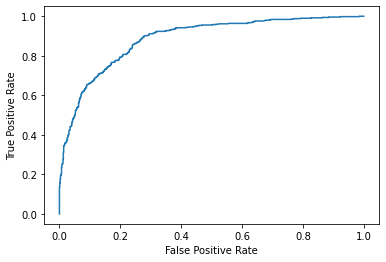

In [209]:
plt.plot(FPR,TPR)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [210]:
results=pd.DataFrame()
results["TPR"]=TPR
results["FPR"]=FPR
results["thresholds"]=thresholds

In [211]:
results=results.sort_values(by="TPR",ascending=False)

In [212]:
results[results["FPR"]<0.3]

,TPR,FPR,thresholds
273,0.911469,0.294529,0.235680
272,0.907445,0.294529,0.238806
270,0.903421,0.288708,0.246783
271,0.903421,0.294529,0.239983
269,0.901408,0.288708,0.247940
...,...,...,...
5,0.156942,0.002328,0.947901
2,0.134809,0.000000,0.962781
3,0.134809,0.001164,0.961956
1,0.002012,0.000000,0.998529


Compare two models

In [123]:
model=LogisticRegression()
model.fit(X_train,y_train)
FPR_logistic,TPR_logistic,thresholds_logistic=roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
FPR_tree,TPR_tree,thresholds_tree=roc_curve(y_test,tree.predict_proba(X_test)[:,1])

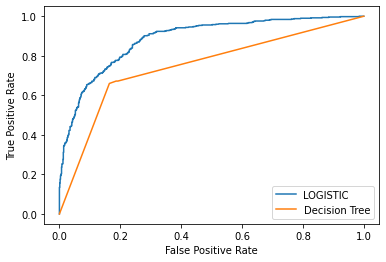

In [127]:
plt.plot(FPR_logistic,TPR_logistic,label="LOGISTIC")
plt.plot(FPR_tree,TPR_tree,label="Decision Tree")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()